# Exploratory Data Analysis
# Analyzing the prices of houses in New York
### Anas Puthawala

Dataset credits go to https://www.kaggle.com/new-york-city/nyc-property-sales/code

## Importing the data

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [50]:
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import StandardScaler

PATH = '/content/drive/MyDrive/'
FILE = 'nyc-rolling-sales.csv'

def load_data(path=PATH, file=FILE):
  csv_path = os.path.join(path, file)
  return pd.read_csv( csv_path)

## Inspecting the data

In [3]:
nyc_housing = load_data()

nyc_housing.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [4]:
nyc_housing

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [5]:
nyc_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [6]:
nyc_housing['SALE PRICE'].value_counts()

 -         14561
0          10228
10           766
450000       427
550000       416
           ...  
271890         1
922073         1
1097406        1
872180         1
864800         1
Name: SALE PRICE, Length: 10008, dtype: int64

In [7]:
nyc_housing['TAX CLASS AT PRESENT'].value_counts()

1     38633
2     30919
4      6140
2A     2521
2C     1915
1A     1444
1B     1234
2B      814
        738
1C      186
3         4
Name: TAX CLASS AT PRESENT, dtype: int64

In [8]:
nyc_housing['GROSS SQUARE FEET'].value_counts()

 -        27612
0         11417
2400        386
1800        361
2000        359
          ...  
221208        1
5997          1
20125         1
492           1
5384          1
Name: GROSS SQUARE FEET, Length: 5691, dtype: int64

In [9]:
nyc_housing.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [10]:
nyc_housing.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [11]:
nyc_housing.shape

(84548, 22)

In [12]:
nyc_housing.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [13]:
nyc_housing.nunique()

Unnamed: 0                        26736
BOROUGH                               5
NEIGHBORHOOD                        254
BUILDING CLASS CATEGORY              47
TAX CLASS AT PRESENT                 11
BLOCK                             11566
LOT                                2627
EASE-MENT                             1
BUILDING CLASS AT PRESENT           167
ADDRESS                           67563
APARTMENT NUMBER                   3989
ZIP CODE                            186
RESIDENTIAL UNITS                   176
COMMERCIAL UNITS                     55
TOTAL UNITS                         192
LAND SQUARE FEET                   6062
GROSS SQUARE FEET                  5691
YEAR BUILT                          158
TAX CLASS AT TIME OF SALE             4
BUILDING CLASS AT TIME OF SALE      166
SALE PRICE                        10008
SALE DATE                           364
dtype: int64

In [14]:
nyc_housing['BOROUGH'].unique()

array([1, 2, 3, 4, 5])

In [15]:
nyc_housing.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [16]:
nyc_housing = nyc_housing.drop(['Unnamed: 0', 'EASE-MENT', 'ADDRESS', 'APARTMENT NUMBER', 'BLOCK'], axis=1)

In [17]:
nyc_housing.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,6,C2,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,26,C7,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,39,C7,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,21,C4,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,55,C2,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


##Relationship analysis

In [18]:
nyc_corr = nyc_housing.corr()

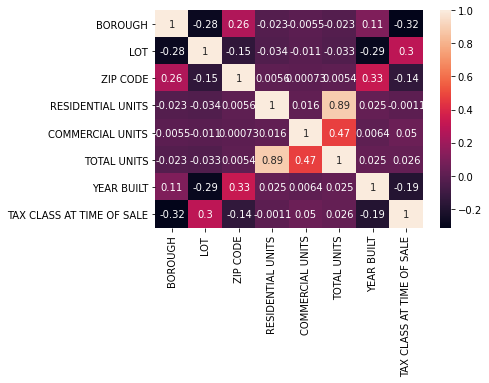

In [19]:
import seaborn as sns
sns.heatmap(nyc_corr, xticklabels=nyc_corr.columns, yticklabels=nyc_corr.columns, annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efce1815450>,
      dtype=object)

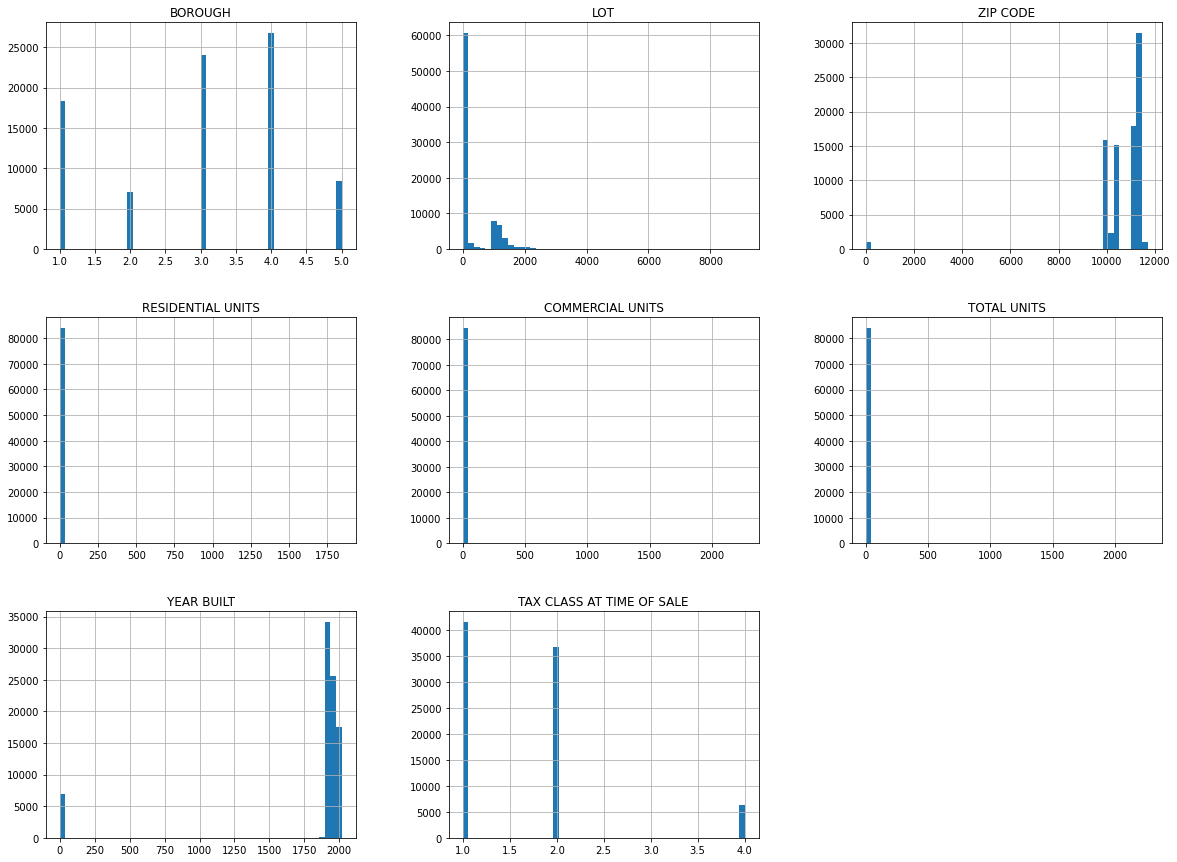

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
nyc_housing.hist(bins=50, figsize=(20,15))

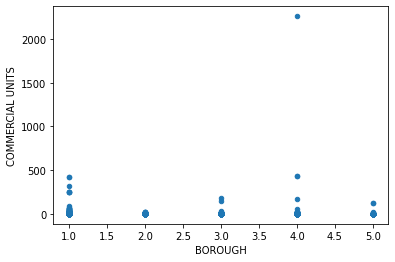

In [21]:
nyc_housing.plot(kind='scatter', x = 'BOROUGH', y= 'COMMERCIAL UNITS')

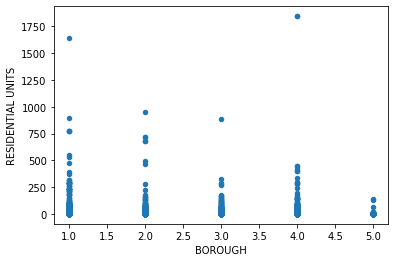

In [22]:
nyc_housing.plot(kind='scatter', x = 'BOROUGH', y= 'RESIDENTIAL UNITS')

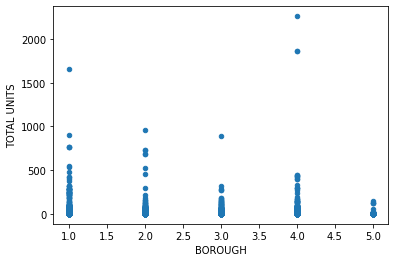

In [23]:
nyc_housing.plot(kind='scatter', x = 'BOROUGH', y= 'TOTAL UNITS')

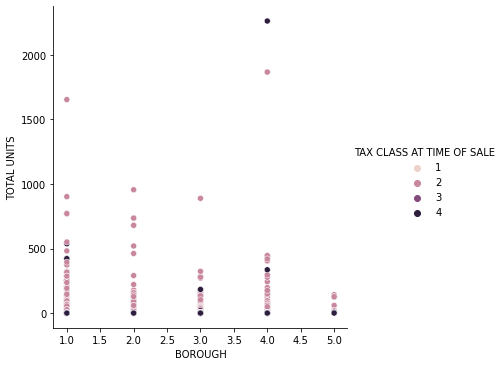

In [24]:
sns.relplot(x= 'BOROUGH', y = 'TOTAL UNITS', hue = 'TAX CLASS AT TIME OF SALE', data = nyc_housing)

## Pre-processing
### For pre-processing make a function that has lots of pre-processing features built into it. This helps A. keep the notebook cleaner and B. is much simpler with all the pre-processing done in one particular area and can be completed with one singular function call.

In [68]:
nyc_housing['SALE PRICE'].unique()

array(['6625000', ' -  ', '3936272', ..., '408092', '11693337', '69300'],
      dtype=object)

In [69]:
def onehotencode(df, columns, prefixes):
  df = df.copy()

  for column, prefix in zip(columns, prefixes):
    temp= pd.get_dummies(df[column], prefix = prefix)
    df = pd.concat([df, temp], axis = 1)
    df = df.drop(column, axis = 1)
    
  return df
  

In [70]:
def pre_process(df):
  df = df.copy()

  #Removes any NaN's from the data 
  df['SALE PRICE'] = df['SALE PRICE'].replace(' -  ', np.NaN).astype(np.float)
  df = df.dropna(axis=0).reset_index(drop=True)

  # y = df['SALE PRICE'].copy()
  # X = df.drop('SALE PRICE', axis=1).copy()

  #Replace all missing values w/ np.NaN
  df = df.replace(' -  ', np.NaN)

  #Fill missing values with column means
  for column in ['LAND SQUARE FEET', 'GROSS SQUARE FEET']:
    df[column] = df[column].astype(np.float)
    df[column] = df[column].fillna(df[column].mean())

  #Get year month and day features from SALE DATE column and make three additional columns
  df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])

  df['YEAR'] = df['SALE DATE'].apply(lambda x: x.year)
  df['MONTH'] = df['SALE DATE'].apply(lambda x: x.month)
  df['DAY'] = df['SALE DATE'].apply(lambda x: x.day)
  
  df = df.drop(['ZIP CODE', 'LOT', 'SALE DATE'], axis=1)

  #one-hot encode features
  df = onehotencode(df, columns=['BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'BUILDING CLASS CATEGORY', 'NEIGHBORHOOD', 'TAX CLASS AT PRESENT'], prefixes = ['BC_PRESENT', 'BC_SALE', 'BC_CATEGORY', 'NEIGHBORHOOD', 'TC_PRESENT'])
  
  
  #Split
  y = df['SALE PRICE'].copy()
  X = df.drop('SALE PRICE', axis=1).copy()
  

  #Scaling
  scaler = StandardScaler()
  X = pd.DataFrame(scaler.fit_transform(X), columns= X.columns)

  return X, y

In [71]:
{column: len(X[column].unique()) for column in X.select_dtypes('object').columns}

{}

In [72]:
X, y = pre_process(nyc_housing)

In [73]:
X

,BOROUGH,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,YEAR,MONTH,DAY,BC_PRESENT_,BC_PRESENT_A0,BC_PRESENT_A1,BC_PRESENT_A2,BC_PRESENT_A3,BC_PRESENT_A4,BC_PRESENT_A5,BC_PRESENT_A6,BC_PRESENT_A7,BC_PRESENT_A9,BC_PRESENT_B1,BC_PRESENT_B2,BC_PRESENT_B3,BC_PRESENT_B9,BC_PRESENT_C0,BC_PRESENT_C1,BC_PRESENT_C2,BC_PRESENT_C3,BC_PRESENT_C4,BC_PRESENT_C5,BC_PRESENT_C6,BC_PRESENT_C7,BC_PRESENT_C8,BC_PRESENT_C9,BC_PRESENT_CM,BC_PRESENT_D0,BC_PRESENT_D1,BC_PRESENT_D2,BC_PRESENT_D3,...,NEIGHBORHOOD_TOTTENVILLE,NEIGHBORHOOD_TRAVIS,NEIGHBORHOOD_TRIBECA,NEIGHBORHOOD_UPPER EAST SIDE (59-79),NEIGHBORHOOD_UPPER EAST SIDE (79-96),NEIGHBORHOOD_UPPER EAST SIDE (96-110),NEIGHBORHOOD_UPPER WEST SIDE (59-79),NEIGHBORHOOD_UPPER WEST SIDE (79-96),NEIGHBORHOOD_UPPER WEST SIDE (96-116),NEIGHBORHOOD_VAN CORTLANDT PARK,NEIGHBORHOOD_WAKEFIELD,NEIGHBORHOOD_WASHINGTON HEIGHTS LOWER,NEIGHBORHOOD_WASHINGTON HEIGHTS UPPER,NEIGHBORHOOD_WEST NEW BRIGHTON,NEIGHBORHOOD_WESTCHESTER,NEIGHBORHOOD_WESTERLEIGH,NEIGHBORHOOD_WHITESTONE,NEIGHBORHOOD_WILLIAMSBRIDGE,NEIGHBORHOOD_WILLIAMSBURG-CENTRAL,NEIGHBORHOOD_WILLIAMSBURG-EAST,NEIGHBORHOOD_WILLIAMSBURG-NORTH,NEIGHBORHOOD_WILLIAMSBURG-SOUTH,NEIGHBORHOOD_WILLOWBROOK,NEIGHBORHOOD_WINDSOR TERRACE,NEIGHBORHOOD_WOODHAVEN,NEIGHBORHOOD_WOODLAWN,NEIGHBORHOOD_WOODROW,NEIGHBORHOOD_WOODSIDE,NEIGHBORHOOD_WYCKOFF HEIGHTS,TC_PRESENT_,TC_PRESENT_1,TC_PRESENT_1A,TC_PRESENT_1B,TC_PRESENT_1C,TC_PRESENT_2,TC_PRESENT_2A,TC_PRESENT_2B,TC_PRESENT_2C,TC_PRESENT_3,TC_PRESENT_4
0,-1.555362,0.213097,-0.018906,0.168314,-0.059242,0.113082,0.193234,0.464269,0.725650,0.126698,0.295594,-0.098536,-0.066593,-0.285157,-0.174711,-0.063944,-0.054991,-0.267083,-0.033403,-0.012538,-0.135565,-0.24829,-0.241604,-0.216045,-0.141458,-0.234839,-0.101452,10.401158,-0.118055,-0.038947,-0.038947,-0.19497,-0.059391,-0.010001,-0.011341,-0.00378,-0.054465,-0.04493,-0.011954,-0.022368,...,-0.05176,-0.031867,-0.087933,-0.146066,-0.138541,-0.023613,-0.125898,-0.101236,-0.065392,-0.005346,-0.058044,-0.040746,-0.060946,-0.05792,-0.04509,-0.052858,-0.065722,-0.07954,-0.064616,-0.080893,-0.077886,-0.078349,-0.045407,-0.050779,-0.065171,-0.034871,-0.036673,-0.062808,-0.038947,-0.098536,-0.899996,-0.134743,-0.106232,-0.051061,-0.794797,5.687092,-0.096521,-0.161918,-0.005346,-0.251163
1,-1.555362,0.556753,-0.018906,0.457734,-0.040280,0.127547,0.218191,0.464269,-1.378076,0.706273,0.749662,-0.098536,-0.066593,-0.285157,-0.174711,-0.063944,-0.054991,-0.267083,-0.033403,-0.012538,-0.135565,-0.24829,-0.241604,-0.216045,-0.141458,-0.234839,-0.101452,-0.096143,-0.118055,25.675956,-0.038947,-0.19497,-0.059391,-0.010001,-0.011341,-0.00378,-0.054465,-0.04493,-0.011954,-0.022368,...,-0.05176,-0.031867,-0.087933,-0.146066,-0.138541,-0.023613,-0.125898,-0.101236,-0.065392,-0.005346,-0.058044,-0.040746,-0.060946,-0.05792,-0.04509,-0.052858,-0.065722,-0.07954,-0.064616,-0.080893,-0.077886,-0.078349,-0.045407,-0.050779,-0.065171,-0.034871,-0.036673,-0.062808,-0.038947,-0.098536,-0.899996,-0.134743,-0.106232,-0.051061,-0.794797,-0.175837,10.360454,-0.161918,-0.005346,-0.251163
2,-1.555362,0.281829,-0.018906,0.226198,-0.037401,0.038510,0.193234,0.464269,-1.378076,1.285848,0.068561,-0.098536,-0.066593,-0.285157,-0.174711,-0.063944,-0.054991,-0.267083,-0.033403,-0.012538,-0.135565,-0.24829,-0.241604,-0.216045,-0.141458,-0.234839,-0.101452,10.401158,-0.118055,-0.038947,-0.038947,-0.19497,-0.059391,-0.010001,-0.011341,-0.00378,-0.054465,-0.04493,-0.011954,-0.022368,...,-0.05176,-0.031867,-0.087933,-0.146066,-0.138541,-0.023613,-0.125898,-0.101236,-0.065392,-0.005346,-0.058044,-0.040746,-0.060946,-0.05792,-0.04509,-0.052858,-0.065722,-0.07954,-0.064616,-0.080893,-0.077886,-0.078349,-0.045407,-0.050779,-0.065171,-0.034871,-0.036673,-0.062808,-0.038947,-0.098536,-0.899996,-0.134743,-0.106232,-0.051061,-0.794797,5.687092,-0.096521,-0.161918,-0.005346,-0.251163
3,-1.555362,0.419291,-0.018906,0.341966,-0.055770,0.022615,0.231630,0.464269,

In [74]:
nan_values = y.isna().sum()
normal_values = y.size - nan_values

mean_nan_vals = y.isna().mean()

mean_nan_vals


0.0

In [75]:
#Additional unnecessary features already removed (called upstream)
# nyc_housing = nyc_housing.drop(['Unnamed: 0', 'EASE-MENT', 'ADDRESS', 'APARTMENT NUMBER', 'BLOCK'], axis=1)

In [76]:
{column: len(X[column].unique()) for column in X.select_dtypes('object').columns}

{}

In [77]:
#View how many missing columns there are, create a dictionary that maps it.
X.isna().sum()

BOROUGH              0
RESIDENTIAL UNITS    0
COMMERCIAL UNITS     0
TOTAL UNITS          0
LAND SQUARE FEET     0
                    ..
TC_PRESENT_2A        0
TC_PRESENT_2B        0
TC_PRESENT_2C        0
TC_PRESENT_3         0
TC_PRESENT_4         0
Length: 645, dtype: int64

In [78]:
X

,BOROUGH,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,YEAR,MONTH,DAY,BC_PRESENT_,BC_PRESENT_A0,BC_PRESENT_A1,BC_PRESENT_A2,BC_PRESENT_A3,BC_PRESENT_A4,BC_PRESENT_A5,BC_PRESENT_A6,BC_PRESENT_A7,BC_PRESENT_A9,BC_PRESENT_B1,BC_PRESENT_B2,BC_PRESENT_B3,BC_PRESENT_B9,BC_PRESENT_C0,BC_PRESENT_C1,BC_PRESENT_C2,BC_PRESENT_C3,BC_PRESENT_C4,BC_PRESENT_C5,BC_PRESENT_C6,BC_PRESENT_C7,BC_PRESENT_C8,BC_PRESENT_C9,BC_PRESENT_CM,BC_PRESENT_D0,BC_PRESENT_D1,BC_PRESENT_D2,BC_PRESENT_D3,...,NEIGHBORHOOD_TOTTENVILLE,NEIGHBORHOOD_TRAVIS,NEIGHBORHOOD_TRIBECA,NEIGHBORHOOD_UPPER EAST SIDE (59-79),NEIGHBORHOOD_UPPER EAST SIDE (79-96),NEIGHBORHOOD_UPPER EAST SIDE (96-110),NEIGHBORHOOD_UPPER WEST SIDE (59-79),NEIGHBORHOOD_UPPER WEST SIDE (79-96),NEIGHBORHOOD_UPPER WEST SIDE (96-116),NEIGHBORHOOD_VAN CORTLANDT PARK,NEIGHBORHOOD_WAKEFIELD,NEIGHBORHOOD_WASHINGTON HEIGHTS LOWER,NEIGHBORHOOD_WASHINGTON HEIGHTS UPPER,NEIGHBORHOOD_WEST NEW BRIGHTON,NEIGHBORHOOD_WESTCHESTER,NEIGHBORHOOD_WESTERLEIGH,NEIGHBORHOOD_WHITESTONE,NEIGHBORHOOD_WILLIAMSBRIDGE,NEIGHBORHOOD_WILLIAMSBURG-CENTRAL,NEIGHBORHOOD_WILLIAMSBURG-EAST,NEIGHBORHOOD_WILLIAMSBURG-NORTH,NEIGHBORHOOD_WILLIAMSBURG-SOUTH,NEIGHBORHOOD_WILLOWBROOK,NEIGHBORHOOD_WINDSOR TERRACE,NEIGHBORHOOD_WOODHAVEN,NEIGHBORHOOD_WOODLAWN,NEIGHBORHOOD_WOODROW,NEIGHBORHOOD_WOODSIDE,NEIGHBORHOOD_WYCKOFF HEIGHTS,TC_PRESENT_,TC_PRESENT_1,TC_PRESENT_1A,TC_PRESENT_1B,TC_PRESENT_1C,TC_PRESENT_2,TC_PRESENT_2A,TC_PRESENT_2B,TC_PRESENT_2C,TC_PRESENT_3,TC_PRESENT_4
0,-1.555362,0.213097,-0.018906,0.168314,-0.059242,0.113082,0.193234,0.464269,0.725650,0.126698,0.295594,-0.098536,-0.066593,-0.285157,-0.174711,-0.063944,-0.054991,-0.267083,-0.033403,-0.012538,-0.135565,-0.24829,-0.241604,-0.216045,-0.141458,-0.234839,-0.101452,10.401158,-0.118055,-0.038947,-0.038947,-0.19497,-0.059391,-0.010001,-0.011341,-0.00378,-0.054465,-0.04493,-0.011954,-0.022368,...,-0.05176,-0.031867,-0.087933,-0.146066,-0.138541,-0.023613,-0.125898,-0.101236,-0.065392,-0.005346,-0.058044,-0.040746,-0.060946,-0.05792,-0.04509,-0.052858,-0.065722,-0.07954,-0.064616,-0.080893,-0.077886,-0.078349,-0.045407,-0.050779,-0.065171,-0.034871,-0.036673,-0.062808,-0.038947,-0.098536,-0.899996,-0.134743,-0.106232,-0.051061,-0.794797,5.687092,-0.096521,-0.161918,-0.005346,-0.251163
1,-1.555362,0.556753,-0.018906,0.457734,-0.040280,0.127547,0.218191,0.464269,-1.378076,0.706273,0.749662,-0.098536,-0.066593,-0.285157,-0.174711,-0.063944,-0.054991,-0.267083,-0.033403,-0.012538,-0.135565,-0.24829,-0.241604,-0.216045,-0.141458,-0.234839,-0.101452,-0.096143,-0.118055,25.675956,-0.038947,-0.19497,-0.059391,-0.010001,-0.011341,-0.00378,-0.054465,-0.04493,-0.011954,-0.022368,...,-0.05176,-0.031867,-0.087933,-0.146066,-0.138541,-0.023613,-0.125898,-0.101236,-0.065392,-0.005346,-0.058044,-0.040746,-0.060946,-0.05792,-0.04509,-0.052858,-0.065722,-0.07954,-0.064616,-0.080893,-0.077886,-0.078349,-0.045407,-0.050779,-0.065171,-0.034871,-0.036673,-0.062808,-0.038947,-0.098536,-0.899996,-0.134743,-0.106232,-0.051061,-0.794797,-0.175837,10.360454,-0.161918,-0.005346,-0.251163
2,-1.555362,0.281829,-0.018906,0.226198,-0.037401,0.038510,0.193234,0.464269,-1.378076,1.285848,0.068561,-0.098536,-0.066593,-0.285157,-0.174711,-0.063944,-0.054991,-0.267083,-0.033403,-0.012538,-0.135565,-0.24829,-0.241604,-0.216045,-0.141458,-0.234839,-0.101452,10.401158,-0.118055,-0.038947,-0.038947,-0.19497,-0.059391,-0.010001,-0.011341,-0.00378,-0.054465,-0.04493,-0.011954,-0.022368,...,-0.05176,-0.031867,-0.087933,-0.146066,-0.138541,-0.023613,-0.125898,-0.101236,-0.065392,-0.005346,-0.058044,-0.040746,-0.060946,-0.05792,-0.04509,-0.052858,-0.065722,-0.07954,-0.064616,-0.080893,-0.077886,-0.078349,-0.045407,-0.050779,-0.065171,-0.034871,-0.036673,-0.062808,-0.038947,-0.098536,-0.899996,-0.134743,-0.106232,-0.051061,-0.794797,5.687092,-0.096521,-0.161918,-0.005346,-0.251163
3,-1.555362,0.419291,-0.018906,0.341966,-0.055770,0.022615,0.231630,0.464269,